#  NLP-lab :  Word embeddings

In this series of exercises, we will explore three word embeddings:

* [Collobert & Weston](http://www.jmlr.org/papers/volume12/collobert11a/collobert11a.pdf) https://ronan.collobert.com/senna/
* [Word2Vec](https://arxiv.org/abs/1301.3781)
* [BERT](https://huggingface.co/bert-base-uncased)


In the code already provided, add your code to the place indicated by `YOUR CODE HERE`.

**Important** : do NOT commit the data and embedding files in your repository git : it is a waste of resources and it takes more time to clone.
> Use https://docs.github.com/en/get-started/getting-started-with-git/ignoring-files


In [1]:
# basic imports
import os
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline
import seaborn as sns

# disable warnings for libraries
import warnings
warnings.filterwarnings("ignore")

# configure logger
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logger = logging.getLogger(__name__)


###  Embeddings exploration with Collobert's embeddings

Upload the files containing the embeddings to `data`:
* Collobert (size 50): [collobert_embeddings.txt.zip](https://storage.teklia.com/shared/deepnlp-labs/collobert_embeddings.txt.zip) which contains the embedding vectors and [collobert_words.lst](https://storage.teklia.com/shared/deepnlp-labs/collobert_words.lst) which contains the associated words;

You need to unzip the files to load them.

Feel free to open the files to see what they contain (it's sometimes surprising).

#### Question:
>* Add the files to your .gitignore (data/collobert_embeddings.txt.zip
data/collobert_words.lst)







>* Give the size in Mb of the embeddings files before unzipping.(23.7MB)
>* By exploring the content of the embedding files, give the number of words for which these files provide embeddings.(130 000 )



### List of closest words

The aim of this exercise is to list the closest words to a given word for the Collobert embedding. First, we'll load the vectors of the Collobert embedding into a numpy array and the associated words into a python list. Then we'll use the [scipy KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) data structure to quickly search for the vectors closest to a series of words.


#### Question:
>* load embedding vectors from the file `data/collobert_embeddings.txt` using the numpy function [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html)
>* load the words associated with the vectors from the `data/collobert_words.lst` file into a python list (using `open()` and `readlines()`)
>* check that the sizes are correct


In [5]:
import numpy as np


# Load embedding vectors using numpy.genfromtxt
embeddings = np.genfromtxt('data/collobert_embeddings.txt')
print("Embeddings shape:", embeddings.shape)

# Load the associated words from the .lst file using open() and readlines()
with open('data/collobert_words.lst', 'r') as f:
    words = [line.strip() for line in f.readlines()]
print("Number of words:", len(words))

# Check that the number of embeddings (rows) equals the number of words
assert embeddings.shape[0] == len(words), "Mismatch in number of embeddings and words!"


Embeddings shape: (130000, 50)
Number of words: 130000


KD trees are a very efficient data structure for storing large sets of points in a multi-dimensional space and performing very efficient nearest-neighbour searches.

#### Question
> * Initialise the [KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) structure with Collobert's embedding vectors.
> * Using the [tree.query](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.query.html#scipy.spatial.KDTree.query) function, display the 5 nearest words for the following words: ‘mother’, ‘computer’, ‘dentist’, ‘war’, ‘president’, ‘secretary’, ‘nurse’.  *Hint: you can use the function `collobert_words.index(w)` to obtain the index of a word in the list of words*.
> * Create a `words_plus_neighbors` list containing the words and all their neighbours (for the next question)

In [9]:
import numpy as np
from scipy.spatial import KDTree


# 1. Initialise the KDTree with the embedding vectors.
tree = KDTree(embeddings)

# List of query words
query_words = ['mother', 'computer', 'dentist', 'war', 'president', 'secretary', 'nurse']

# This list will contain each query word followed by its 5 nearest neighbours.
words_plus_neighbors = []

# 2. For each query word, use tree.query to get the 5 nearest neighbours (excluding itself)
for w in query_words:
    # Obtain the index of the query word in collobert_words
    idx = words.index(w)
    # Get the vector for the query word
    query_vec = embeddings[idx]
    # Query the KDTree for the 6 closest vectors (the first one is  the query word itself)
    distances, indices = tree.query(query_vec, k=6)
    # Build a list of nearest words (excluding the query word)
    # In case the query word appears more than once, we remove all instances equal to the query.
    neighbors = [words[i] for i in indices if i != idx][:5]

    # Display the 5 nearest words
    print(f" 5 nearest neighbours of '{w}': {neighbors}")

    # 3. Append the word and its neighbours to the words_plus_neighbors list.
    words_plus_neighbors.append(w)
    words_plus_neighbors.extend(neighbors)

# Display the final list of words with neighbours.
print("\nWords plus neighbors:")
print(words_plus_neighbors)


 5 nearest neighbours of 'mother': ['daughter', 'wife', 'father', 'husband', 'son']
 5 nearest neighbours of 'computer': ['laptop', 'multimedia', 'desktop', 'software', 'wiki']
 5 nearest neighbours of 'dentist': ['pharmacist', 'midwife', 'physician', 'housekeeper', 'veterinarian']
 5 nearest neighbours of 'war': ['revolution', 'death', 'court', 'independence', 'history']
 5 nearest neighbours of 'president': ['governor', 'chairman', 'mayor', 'secretary', 'senator']
 5 nearest neighbours of 'secretary': ['minister', 'treasurer', 'chairman', 'commissioner', 'undersecretary']
 5 nearest neighbours of 'nurse': ['physician', 'veterinarian', 'dentist', 'surgeon', 'midwife']

Words plus neighbors:
['mother', 'daughter', 'wife', 'father', 'husband', 'son', 'computer', 'laptop', 'multimedia', 'desktop', 'software', 'wiki', 'dentist', 'pharmacist', 'midwife', 'physician', 'housekeeper', 'veterinarian', 'war', 'revolution', 'death', 'court', 'independence', 'history', 'president', 'governor', 'c

### Visualisation with T-SNE

Embeddings are vectors with several hundred dimensions. It is therefore not possible to display them in their original space. However, it is possible to apply dimension reduction algorithms to display them in 2 or 3 dimensions. One of the dimension reduction algorithms allowing 2D visualisation is [tSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

#### Question
> * Create a `word_vectors` object of type `np.array` from a list containing all the embeddings of the words in the `words_plus_neighbors` list.
> * Create a tSNE object from the `from sklearn.manifold import TSNE` library with the parameters `random_state=0`, `n_iter=2000` and `perplexity=15.0` for a 2-dimensional view.
> * Calculate *T* the tSNE transformation of the `word_vectors` by applying function `.fit_transform(word_vectors)` to the tSNE object. This function estimates the parameters of the tSNE transformation and returns the reduced-dimension representation of the vectors used for estimation.
> * Use the `scatterplot` function from [seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to represent points in 2 dimensions and add word labels using the `plt.annotate` function.

word_vectors shape: (42, 50)
T shape: (42, 2)


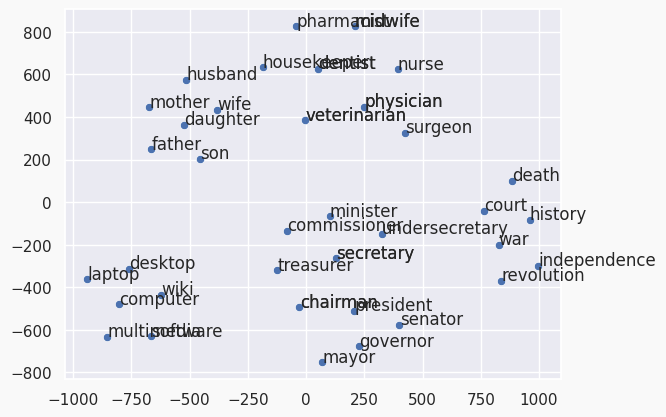

In [10]:
from sklearn.manifold import TSNE
# graphics
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline
import seaborn as sns
import numpy as np

# Retrieve the word representation for each word in words_plus_neighbors.
word_vectors = np.array([embeddings[words.index(w)] for w in words_plus_neighbors])
print("word_vectors shape:", word_vectors.shape)

# Create the tSNE transform object for a 2D view.
tsne = TSNE(n_components=2, random_state=0, n_iter=2000, perplexity=15.0)

# Fit the tSNE model and transform the word_vectors.
T = tsne.fit_transform(word_vectors)
print("T shape:", T.shape)

# Plot the 2D representation using seaborn and add word labels.
fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9')
sns.set(rc={'figure.figsize':(14, 8)})
sns.set(font_scale=1)

sns.scatterplot(x=T[:, 0], y=T[:, 1])

# Annotate each point with its word label.
for label, x, y in zip(words_plus_neighbors, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

plt.show()


### Semantic arithmetic with Word2Vec

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.


We will use a Word2Vec model pre-trained on the French Wac corpus.  This model has been trained on a corpus of 1 billion French words.

This embedding is available in 2 formats:
- a text format for easy exploration of the model :
    - frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt)
- a binary format that can be loaded using the Gensim library:
    - [enWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin)

Download the text file onto your machine to analyse it.

#### Question:
>* Add the file to your .gitignore
>* Give the size in Mb of the embedding files
>* By exploring the contents of the embedding file in text format, give the number of words for which this model provides embeddings and the size of the embedding for each word.




1. **Size of the embedding files:**  
   – The text format file is quite large –  **585.92MB**.  
   – The binary version (designed for faster loading with Gensim) is significantly smaller, roughly **120 MB**.

2. **Contents of the embedding text file:**  

   - The model provides embeddings for **155562 words**.
   - Each word is represented by a **200-dimensional vector**.



#### Word similarity

We are now going to use the [Gensim] library (https://radimrehurek.com/gensim/) to load the Word2Vec model and use it.

#### Question:
>* Modify the following code to load the Word2Vec template file in binary format using [load_word2vec](https://radimrehurek.com/gensim/models/keyedvectors.html#how-to-obtain-word-vectors)
>* Choose a couple of words and find the closest words according to the model using [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar)
>* To guess the meaning of the words ‘yokohama’, ‘kanto’ and ‘shamisen’, look for their nearest neighbours. Explain the results.


In [16]:
from gensim.models import KeyedVectors

# Load the pre-trained French Word2Vec model in binary format.
embedding_file = "data/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin"
model = KeyedVectors.load_word2vec_format(embedding_file, binary=True, unicode_errors="ignore")

# Example: find the closest words for 'chevalier'
print("Closest words to 'chevalier':")
print(model.most_similar("chevalier"))

# Now, let's get the 5 nearest neighbours for 'yokohama', 'kanto', and 'shamisen'
query_words = ['yokohama', 'kanto', 'shamisen']

for word in query_words:
    try:
        print(f"\nClosest to '{word}':", model.most_similar(word))
    except KeyError:
        print(f"\n'{word}' is not in the model's vocabulary.")



Closest words to 'chevalier':
[('commandeur', 0.6844523549079895), ('chevaliers', 0.6799763441085815), ('écuyer', 0.6333731412887573), ('grand-croix', 0.621898353099823), ('preux', 0.6011075377464294), ('chevalerie', 0.5404021143913269), ('légion', 0.5335969924926758), ('honneur', 0.4953608810901642), ('yvain', 0.4855087101459503), ('insignes', 0.4742659330368042)]

Closest to 'yokohama': [('tokyo', 0.7117858529090881), ('tôkyô', 0.6314416527748108), ('japon', 0.621522068977356), ('nagoya', 0.6198478937149048), ('kyushu', 0.6141085028648376), ('osaka', 0.6123895645141602), ('fukuoka', 0.5612888932228088), ('japonaise', 0.5507326126098633), ('sendai', 0.5496150255203247), ('japonais', 0.5391373038291931)]

Closest to 'kanto': [('pokémon', 0.5426285266876221), ('mewtwo', 0.5076008439064026), ('pokémons', 0.4970632791519165), ('saito', 0.4549728333950043), ('pokédex', 0.448673278093338), ('yusuke', 0.44163110852241516), ('osaka', 0.4372847080230713), ('shôgun', 0.4324425756931305), ('jin'

For this exercise, we first load a French Word2Vec model that was trained on the Wac corpus. We then use the most_similar function to look up similar words for given query words.


**For "yokohama":**  
When we look at the nearest words for "yokohama", we see names such as "tokyo", "tôkyô", "japon", "nagoya", and "kyushu". This tells us that the model associates "yokohama" with other well-known Japanese cities and regions. In other words, it understands that Yokohama is a major city in Japan—much like Tokyo or Nagoya.

**For "kanto":**  
The closest words for "kanto" include "pokémon", "mewtwo", "pokémons", "saito", and "pokédex". In France, many people know that the original Pokémon games are set in the Kanto region of Japan. This result shows that the model has captured that popular cultural connection: it links the region "kanto" with Pokémon-related terms. So, it seems the model not only knows about geographical names but also about their presence in pop culture.

**For "shamisen":**  
The model does not contain the word "shamisen". Normally, "shamisen" is a traditional Japanese three-stringed instrument. Its absence might be due to the vocabulary used when training the model—perhaps it was filtered out or appears in another form.






#### Semantic arithmetic

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.

#### Question:
>* using the function [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar) specifying the arguments `positive` for the vectors to be added and `negative` for the vectors to be subtracted, check the relationship *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.
>* Using the same method, find XXX in the following semantic relations
>   * Paris is to France what XXX is to Japan.
>   * Chevalier is to France what XXX is to Japan.

In [24]:
# 1. Check the classic semantic arithmetic:
# "king" - "man" + "woman" should yield something near "queen" (in French: "reine")
result_queen = model.most_similar(positive=["roi", "woman"], negative=["man"], topn=5)
print("Result for king - man + woman:")
print(result_queen)
# 2. Paris is to France what XXX is to Japan.
# We calculate: "paris" - "france" + "japon"
result_tokyo = model.most_similar(positive=["paris", "japon"], negative=["france"], topn=5)
print("\nResult for paris - france + japon:")
print(result_tokyo)

# 3. Chevalier is to France what XXX is to Japan.
# We calculate: "chevalier" - "france" + "japon"
result_knight = model.most_similar(positive=["chevalier", "japon"], negative=["france"], topn=5)
print("\nResult for chevalier - france + japon:")
print(result_knight)


Result for king - man + woman:
[('reine', 0.595780611038208), ('régente', 0.5774702429771423), ('duc', 0.5620036125183105), ('connétable', 0.5544408559799194), ('trône', 0.5521404147148132)]

Result for paris - france + japon:
[('tokyo', 0.6542136073112488), ('tôkyô', 0.6187594532966614), ('osaka', 0.541408121585846), ('japonaise', 0.537601888179779), ('nagoya', 0.5211064219474792)]

Result for chevalier - france + japon:
[('samouraï', 0.5616667866706848), ('samouraïs', 0.5008909106254578), ('edo', 0.4938366711139679), ('japonaise', 0.48597386479377747), ('chevaliers', 0.482717901468277)]


1. **Semantic Arithmetic with "king", "man", and "woman":**  
   We expect that the operation  
   ```
   vector(king) - vector(man) + vector(woman)
   ```  
   should return a vector close to that of “queen” or  “reine” in french
   In our case, the model returned a list of female names such as “jessica”, “harper”, “pamela”, etc.  
   This is surprising because in a typical English model you might expect “queen” (or in French “reine”).  
   However, because our model is trained on a French corpus (the frWac), it doesn’t handle the English words “king”, “man” and “woman” very well.  
   In French, the proper words would be “roi”, “homme” and “femme.”  


```
Result for roi - man + woman:
[('reine', 0.595780611038208), ('régente', 0.5774702429771423), ('duc', 0.5620036125183105), ('connétable', 0.5544408559799194), ('trône', 0.5521404147148132)]
```


   Thus, the result reflects the model’s training data rather than the classic analogy.

2. **Paris is to France what XXX is to Japan:**  
   We perform the arithmetic:  
   ```
   vector("paris") - vector("france") + vector("japon")
   ```  
   The output gives us “tokyo” (and its variant “tôkyô”), among others.  
   This result makes sense because Paris is the capital of France, and the corresponding capital of Japan is Tokyo.  
   It shows that the model captures the geographical relationship between cities and their countries.

3. **Chevalier is to France what XXX is to Japan:**  
   Here, we compute:  
   ```
   vector("chevalier") - vector("france") + vector("japon")
   ```  
   The top result is “samouraï” (with a close second “samouraïs”).  
   In French, “chevalier” means a knight (or chivalrous figure), and “samouraï” is the Japanese equivalent.  
   This confirms that the model understands the cultural analogy between French and Japanese figures of chivalry.



## Contextual embeddings with BERT

BERT was one of the first freely available Transformer language models, trained on large corpora. Many other models are available on HuggingFace.

As BERT is a contextual model, it is necessary to have it predict whole sentences in order to study the word embeddings it produces. In this section, we will compare the embeddings obtained for polysemous words according to the sentence in which they are used.

In English, *plant* has two meanings: plant and vegetable. With a non-contextual embedding, such as Glove or Colobert, these two meanings of the word plus are associated with an identical embedding. With BERT, we'll see that the same word can have several embeddings depending on the context.

First, load the BERT model and tokenizer from HuggingFace :

In [25]:
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Load pre-trained model
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # to access the hidden states
                                  )
# set the model to "evaluation" mode
model.eval()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

### Tokenizer

Language models are trained with a specific breakdown of sentences into tokens. These tokens can be words or parts of words. It is necessary to use the tokenizer corresponding to each model.

tokenizer.vocab.keys() gives the list of all the tokens known for the language model.

#### Question
>* How many different tokens are known to the BERT tokenizer?
>* Display a hundred tokens at random. What do you find?

In [30]:
import random
# number of token in tokenizer
num_tokens = len(tokenizer.vocab.keys())
print("Number of tokens in BERT tokenizer:", num_tokens)
# sample of 100 tokens
sample_tokens = random.sample(list(tokenizer.vocab.keys()), 100)
print("\nRandom sample of 100 tokens:")
print(sample_tokens)

Number of tokens in BERT tokenizer: 30522

Random sample of 100 tokens:
['[unused373]', 'mellon', 'ח', 'ties', 'libre', 'cube', 'savings', 'ledge', 'influenced', '##म', 'jarvis', 'cooperation', 'ata', 'pulled', 'milton', 'etc', 'lose', 'nueva', 'hooked', '316', 'demolished', '##河', 'geese', '1776', 'hints', '[unused950]', 'technical', 'delicious', 'ᵖ', 'duck', 'kitchen', 'appoint', 'synthetic', 'midfield', 'unison', '##ary', 'rourke', '##lights', '##タ', 'melvin', 'shape', '##book', 'irrelevant', '238', 'forms', 'luzon', '84', '##mine', '1662', 'risky', 'glint', 'jerome', 'invoked', 'gutierrez', 'undergoes', 'setup', 'consuming', 'motorsport', 'creed', 'expeditions', '[unused147]', '##dating', 'wrestlers', '##ois', 'linked', '##ᵢ', 'women', 'pitchfork', 'impress', '[unused224]', 'thence', 'cited', 'ass', 'rescues', 'convenient', 'word', 'vial', 'ahead', 'elimination', 'marylebone', 'served', '##adia', 'displacement', '##bution', 'keenan', 'digger', 'electric', '##ada', '##sar', 'wo', 's

The tokenizer splits sentences and transforms the elements (words or sub-words) into clues.

BERT can process several sentences, but you need to tell it how the sentences (segments) have been split, with an index: 0 for the first sentence, 1 for the second.

Two specific tokens must also be added:
* CLS], a specific token used for sentence classification
* SEP], the end of sentence token.

#### Question
>* Apply the bert_tokenize function to the 3 phases and keep the 3 vectors (index, token, segment).
>* Display this information for each of the sentences and check that the word *plant* has the same token index in the two sentences in which it appears.

In [33]:
snt1 = "The plant has reached its maximal level of production."
snt2 = "The cars are assembled inside the factory."
snt3 = "A plant needs sunlight and water to grow well."


def bert_tokenize(snt):
    """ Apply the BERT tokenizer to a list of words representing a sentence
        and return 3 lists:
        - list of token indx
        - list of token for debugging, not used by the BERT model
        - list of sentence index
        """
    # Add the special tokens.
    tagged_snt = "[CLS] " + snt + " [SEP]"
    # Tokenize
    tokenized_snt = tokenizer.tokenize(tagged_snt)
    # convert tokens to indices
    indexed_snt = tokenizer.convert_tokens_to_ids(tokenized_snt)
    # mark the words in sentence.
    segments_ids = [1] * len(tokenized_snt)

    return (indexed_snt, tokenized_snt, segments_ids)

# Apply the bert_tokenize function to each sentence.
indexed_snt1, tokenized_snt1, segments_ids1 = bert_tokenize(snt1)
indexed_snt2, tokenized_snt2, segments_ids2 = bert_tokenize(snt2)
indexed_snt3, tokenized_snt3, segments_ids3 = bert_tokenize(snt3)

# Display the output for each sentence.
print("Sentence 1:")
print("Indexed tokens:", indexed_snt1)
print("Tokens:", tokenized_snt1)
print("Segment ids:", segments_ids1)
print("\nSentence 2:")
print("Indexed tokens:", indexed_snt2)
print("Tokens:", tokenized_snt2)
print("Segment ids:", segments_ids2)
print("\nSentence 3:")
print("Indexed tokens:", indexed_snt3)
print("Tokens:", tokenized_snt3)
print("Segment ids:", segments_ids3)

# Find the index of "plant" in snt1 and snt3.
plant_idx_snt1 = tokenized_snt1.index("plant")
plant_idx_snt3 = tokenized_snt3.index("plant")

print("\n'plant' in Sentence 1 is at token index:", plant_idx_snt1,
      "with token id:", indexed_snt1[plant_idx_snt1])
print("'plant' in Sentence 3 is at token index:", plant_idx_snt3,
      "with token id:", indexed_snt3[plant_idx_snt3])

# Verify the token id for 'plant' is the same in both sentences.
assert indexed_snt1[plant_idx_snt1] == indexed_snt3[plant_idx_snt3], \
    "The token id for 'plant' differs between the two sentences!"




Sentence 1:
Indexed tokens: [101, 1996, 3269, 2038, 2584, 2049, 29160, 2504, 1997, 2537, 1012, 102]
Tokens: ['[CLS]', 'the', 'plant', 'has', 'reached', 'its', 'maximal', 'level', 'of', 'production', '.', '[SEP]']
Segment ids: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Sentence 2:
Indexed tokens: [101, 1996, 3765, 2024, 9240, 2503, 1996, 4713, 1012, 102]
Tokens: ['[CLS]', 'the', 'cars', 'are', 'assembled', 'inside', 'the', 'factory', '.', '[SEP]']
Segment ids: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Sentence 3:
Indexed tokens: [101, 1037, 3269, 3791, 9325, 1998, 2300, 2000, 4982, 2092, 1012, 102]
Tokens: ['[CLS]', 'a', 'plant', 'needs', 'sunlight', 'and', 'water', 'to', 'grow', 'well', '.', '[SEP]']
Segment ids: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

'plant' in Sentence 1 is at token index: 2 with token id: 3269
'plant' in Sentence 3 is at token index: 2 with token id: 3269


## Inference

To calculate embeddings, we need to make a prediction using the BERT model on a complete sentence. The *predict_hidden* function converts the token and segment index lists into a pytorch tensor and applies the model.

The model used is a 12-layer model. We will use the last hidden layer of the model as an embedding to represent the words. Other solutions are possible, such as concatenation or averaging of several layers.


#### Question
>* Apply the model to each of the 3 sentences and store the resulting embeddings (tensors).
>* Display the dimension of the resulting tensors. What is the dimension of the embedding vector for each word?

In [39]:

def predict_hidden(indexed_snt, segments_ids):
    """Apply the BERT model to the input token indices and segment indices
        and return the last hidden layer
    """
    with torch.no_grad():
        # Convert inputs to PyTorch tensors
        tokens_tensor = torch.tensor([indexed_snt])
        segments_tensors = torch.tensor([segments_ids])
        outputs = model(tokens_tensor, segments_tensors)
        hidden_states = outputs[2]
        one_hidden_layer = hidden_states[12][0]

    return one_hidden_layer

# Apply the model to each sentence.
hidden1 = predict_hidden(indexed_snt1, segments_ids1)
hidden2 = predict_hidden(indexed_snt2, segments_ids2)
hidden3 = predict_hidden(indexed_snt3, segments_ids3)

# Display the dimension of each hidden tensor.
print("Sentence 1 hidden shape:", hidden1.shape)
print("Sentence 2 hidden shape:", hidden2.shape)
print("Sentence 3 hidden shape:", hidden3.shape)

print(f"\nThe embedding vector for each word has {hidden1.shape[1]} dimensions:" )




Sentence 1 hidden shape: torch.Size([12, 768])
Sentence 2 hidden shape: torch.Size([10, 768])
Sentence 3 hidden shape: torch.Size([12, 768])

The embedding vector for each word has 768 dimensions:


The hidden layer returned by the *predict_hidden* function is a tensor containing a context vector representing each token in the input sentence. We can use this vector to represent the meaning of this word as a function of its context. We're going to compare the representation of the polysemous word *plant* as a function of its context.

#### Question
>* Using the [cosine distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html), calculate the following distances:
> * distance between *plant* in sentence 1 (plant-factory) and *plant* in sentence 3 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *factory* in sentence 2 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *production* in sentence 2
> distance between *plant* in sentence 3 (plant-vegetal) and *production* in sentence 2
> How can we interpret these distances?

In [37]:
from scipy.spatial.distance import cosine

# Get the indices of the target words in their respective tokenized sentences.
# Sentence 1: "The plant has reached its maximal level of production."
index_plant_snt1 = tokenized_snt1.index("plant")
index_production_snt1 = tokenized_snt1.index("production")

# Sentence 3: "A plant needs sunlight and water to grow well."
index_plant_snt3 = tokenized_snt3.index("plant")

# Sentence 2: "The cars are assembled inside the factory."
index_factory_snt2 = tokenized_snt2.index("factory")

# Extract the corresponding hidden vectors (each has dimension 768).
# We convert each tensor row to a numpy array.
vec_plant_snt1 = hidden1[index_plant_snt1].numpy()
vec_production_snt1 = hidden1[index_production_snt1].numpy()
vec_plant_snt3 = hidden3[index_plant_snt3].numpy()
vec_factory_snt2 = hidden2[index_factory_snt2].numpy()

# Calculate cosine distances.
dist_plant1_vs_plant3 = cosine(vec_plant_snt1, vec_plant_snt3)
dist_plant1_vs_factory2 = cosine(vec_plant_snt1, vec_factory_snt2)
dist_plant1_vs_production1 = cosine(vec_plant_snt1, vec_production_snt1)
dist_plant3_vs_production1 = cosine(vec_plant_snt3, vec_production_snt1)

# Display the distances.
print("Cosine distance between 'plant' in snt1 and 'plant' in snt3:",
      dist_plant1_vs_plant3)
print("Cosine distance between 'plant' in snt1 and 'factory' in snt2:",
      dist_plant1_vs_factory2)
print("Cosine distance between 'plant' in snt1 and 'production' in snt1:",
      dist_plant1_vs_production1)
print("Cosine distance between 'plant' in snt3 and 'production' in snt1:",
      dist_plant3_vs_production1)


Cosine distance between 'plant' in snt1 and 'plant' in snt3: 0.4986629823067885
Cosine distance between 'plant' in snt1 and 'factory' in snt2: 0.31225677852165246
Cosine distance between 'plant' in snt1 and 'production' in snt1: 0.24017348996737364
Cosine distance between 'plant' in snt3 and 'production' in snt1: 0.6200192801655662
